## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.2, 0.5]
redice_lr_patient = [10, 15]

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
from keras.layers import BatchNormalization

import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=reduce_patient, 
                                  verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.20, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

50000/50000 [==============================] - 6s 126us/step - loss: 1.3143 - acc: 0.5428 - val_loss: 1.4979 - val_acc: 0.4689
Epoch 12/25
50000/50000 [==============================] - 6s 128us/step - loss: 1.2890 - acc: 0.5511 - val_loss: 1.4830 - val_acc: 0.4740
Epoch 13/25
50000/50000 [==============================] - 6s 126us/step - loss: 1.2666 - acc: 0.5598 - val_loss: 1.4792 - val_acc: 0.4797
Epoch 14/25
50000/50000 [==============================] - 7s 137us/step - loss: 1.2451 - acc: 0.5684 - val_loss: 1.4747 - val_acc: 0.4726
Epoch 15/25
50000/50000 [==============================] - 7s 131us/step - loss: 1.2240 - acc: 0.5746 - val_loss: 1.4628 - val_acc: 0.4802
Epoch 16/25
50000/50000 [==============================] - 6s 129us/step - loss: 1.2042 - acc: 0.5820 - val_loss: 1.4671 - val_acc: 0.4792
Epoch 17/25
50000/50000 [==============================] - 6s 126us/step - loss: 1.1851 - acc: 0.5889 - val_loss: 1.4791 - val_acc: 0.4817
Epoch 18/25
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 10s 193us/step - loss: 2.2349 - acc: 0.2656 - val_loss: 2.0809 - val_acc: 0.3039
Epoch 2/25
50000/50000 [==============================] - 7s 133us/step - loss: 1.7634 - acc: 0.3837 - val_loss: 1.8638 - val_acc: 0.3549
Epoch 3/25
50000/50000 [==============================] - 7s 134us/step - loss: 1.6291 - acc: 0.4280 - val_loss: 1.6995 - val_acc: 0.4095
Epoch 4/25
50000/50000 [==============================] - 8s 151us/step - loss: 1.5530 - acc: 0.4555 - val_loss: 1.6503 - val_acc: 0.4097
Epoch 5/25
50000/50000 [==============================] - 7s 144us/step - loss: 1.4959 - acc: 0.4759 - val_loss: 1.5861 - val_acc: 0.4406
Epoch 6/25
50000/50000 [==============================] - 6s 128us/step - loss: 1.4509 - acc: 0.4918 - val_loss: 1.5781 - val_acc: 0.4400
Epoch 7/25
50000/50000 [==============================] - 6s 122us/step - loss: 1.4136 - acc: 0.5050 - val_loss: 1.5457 -

50000/50000 [==============================] - 7s 131us/step - loss: 0.3975 - acc: 0.8892 - val_loss: 1.5759 - val_acc: 0.5292
Epoch 24/25
50000/50000 [==============================] - 6s 128us/step - loss: 0.3841 - acc: 0.8940 - val_loss: 1.5674 - val_acc: 0.5246
Epoch 25/25
50000/50000 [==============================] - 6s 126us/step - loss: 0.3672 - acc: 0.9007 - val_loss: 1.5950 - val_acc: 0.5345
Numbers of exp: 5, reduce_factor: 0.20, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_l

50000/50000 [==============================] - 6s 128us/step - loss: 1.0203 - acc: 0.6474 - val_loss: 1.4602 - val_acc: 0.4896
Epoch 11/25
50000/50000 [==============================] - 6s 127us/step - loss: 0.9883 - acc: 0.6573 - val_loss: 1.4565 - val_acc: 0.4896
Epoch 12/25
50000/50000 [==============================] - 7s 131us/step - loss: 0.9532 - acc: 0.6699 - val_loss: 1.5161 - val_acc: 0.4703
Epoch 13/25
50000/50000 [==============================] - 6s 126us/step - loss: 0.9233 - acc: 0.6809 - val_loss: 1.4464 - val_acc: 0.5031
Epoch 14/25
50000/50000 [==============================] - 6s 129us/step - loss: 0.8934 - acc: 0.6948 - val_loss: 1.5072 - val_acc: 0.4855
Epoch 15/25
50000/50000 [==============================] - 6s 126us/step - loss: 0.8658 - acc: 0.7057 - val_loss: 1.4936 - val_acc: 0.4867
Epoch 16/25
50000/50000 [==============================] - 6s 126us/step - loss: 0.8334 - acc: 0.7171 - val_loss: 1.4985 - val_acc: 0.4866
Epoch 17/25
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 9s 185us/step - loss: 1.8456 - acc: 0.3661 - val_loss: 2.7644 - val_acc: 0.2128
Epoch 2/25
50000/50000 [==============================] - 6s 122us/step - loss: 1.5351 - acc: 0.4573 - val_loss: 5.1792 - val_acc: 0.1517
Epoch 3/25
50000/50000 [==============================] - 6s 126us/step - loss: 1.4286 - acc: 0.4946 - val_loss: 2.3596 - val_acc: 0.2914
Epoch 4/25
50000/50000 [==============================] - 6s 122us/step - loss: 1.3409 - acc: 0.5263 - val_loss: 1.7749 - val_acc: 0.3799
Epoch 5/25
50000/50000 [==============================] - 6s 127us/step - loss: 1.2735 - acc: 0.5486 - val_loss: 2.0830 - val_acc: 0.3328
Epoch 6/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.2232 - acc: 0.5686 - val_loss: 2.2345 - val_acc: 0.3578
Epoch 7/25
50000/50000 [==============================] - 6s 122us/step - loss: 1.1717 - acc: 0.5871 - val_loss: 1.8761 - 

50000/50000 [==============================] - 6s 124us/step - loss: 0.7650 - acc: 0.7458 - val_loss: 1.7079 - val_acc: 0.4429
Epoch 24/25
50000/50000 [==============================] - 6s 122us/step - loss: 0.7387 - acc: 0.7565 - val_loss: 2.1306 - val_acc: 0.4065
Epoch 25/25
50000/50000 [==============================] - 6s 121us/step - loss: 0.7211 - acc: 0.7625 - val_loss: 1.8056 - val_acc: 0.4396
Numbers of exp: 10, reduce_factor: 0.50, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_31 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_

50000/50000 [==============================] - 6s 126us/step - loss: 1.1011 - acc: 0.6199 - val_loss: 1.6104 - val_acc: 0.4475
Epoch 11/25
50000/50000 [==============================] - 6s 124us/step - loss: 1.0667 - acc: 0.6330 - val_loss: 1.6239 - val_acc: 0.4457
Epoch 12/25
50000/50000 [==============================] - 6s 123us/step - loss: 1.0339 - acc: 0.6477 - val_loss: 1.5838 - val_acc: 0.4643
Epoch 13/25
50000/50000 [==============================] - 6s 126us/step - loss: 1.0072 - acc: 0.6529 - val_loss: 1.7060 - val_acc: 0.4536
Epoch 14/25
50000/50000 [==============================] - 6s 125us/step - loss: 0.9739 - acc: 0.6682 - val_loss: 1.6493 - val_acc: 0.4501
Epoch 15/25
50000/50000 [==============================] - 6s 124us/step - loss: 0.9474 - acc: 0.6801 - val_loss: 1.5992 - val_acc: 0.4609
Epoch 16/25
50000/50000 [==============================] - 6s 125us/step - loss: 0.9217 - acc: 0.6879 - val_loss: 1.6767 - val_acc: 0.4618
Epoch 17/25
50000/50000 [==============

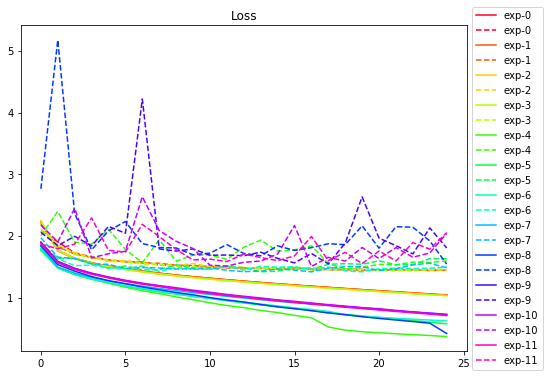

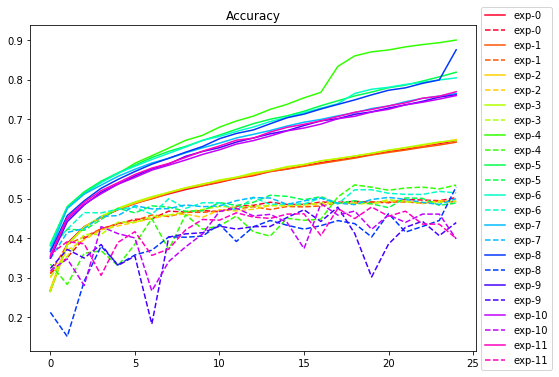

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()